In [13]:
import gcsfs
import pandas as pd
import rdkit
from rdkit.Chem import Descriptors

from dvcx.catalog import get_catalog
from dvcx.error import DatasetNotFoundError
from dvcx.query import C, DatasetQuery, Object, udf
from dvcx.sql.types import String, Float, Int

# DVCx with `gs://` dataset

In [14]:
STORAGE = "gcs://dvc-cse/example-dvcx-pdb/refined-set"

wds = (
    DatasetQuery(STORAGE)
    .filter(C.name.glob("*.pdb"))
)

wds.to_pandas()

,id,vtype,dir_type,parent_id,parent,name,checksum,etag,version,is_latest,last_modified,size,owner_name,owner_id,anno,random,location,source
0,1036,,0,None,example-dvcx-pdb/refined-set/2p2a,2p2a_pocket.pdb,bb7e5272da52f6a24490c7e94e9bb692,CL+l44nKlIUDEAE=,1711547172311743,1,2024-03-27 13:46:12.314000+00:00,48533,,,None,4932126455042298073,None,gcs://dvc-cse
1,1037,,0,None,example-dvcx-pdb/refined-set/2p2a,2p2a_protein.pdb,f5e665a3d861cb31ff219aaa8d9f379f,COi3z5HKlIUDEAE=,1711547188763624,1,2024-03-27 13:46:28.764000+00:00,674867,,,None,5564574799767624138,None,gcs://dvc-cse
2,1040,,0,None,example-dvcx-pdb/refined-set/5i80,5i80_pocket.pdb,e5ca5ebdb0a84b7ba80e3075e880596d,CL+qlaDKlIUDEAE=,1711547219268927,1,2024-03-27 13:46:59.270000+00:00,30205,,,None,7564525978459980801,None,gcs://dvc-cse
3,1041,,0,None,example-dvcx-pdb/refined-set/5i80,5i80_protein.pdb,38457d7a6e4dc5a5d0f0980ec31eb95f,CLrtsaDKlIUDEAE=,1711547219736250,1,2024-03-27 13:46:59.738000+00:00,111416,,,None,2292415973947352260,None,gcs://dvc-cse
4,1044,,0,None,example-dvcx-pdb/refined-set/1q8u,1q8u_pocket.pdb,c415450570580161e41259ec5bc36989,CLyrjLLKlIUDEAE=,1711547256870332,1,2024-03-27 13:47:36.871000+00:00,43951,,,None,4930459827851244105,None,gcs://dvc-cse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,9793,,0,None,example-dvcx-pdb/refined-set/3dx3,3dx3_protein.pdb,66ee67abd49a539233ac0ce0ac837cb8,CI/xrPXJlIUDEAE=,1711547129477263,1,2024-03-27 13:45:29.478000+00:00,1390506,,,None,6894780346720118004,None,gcs://dvc-cse
1492,16953,,0,None,example-dvcx-pdb/refined-set/5ix0,5ix0_pocket.pdb,bbb6556844d388f1dd5eed3886f55986,CLSG7Z3KlIUDEAE=,1711547214414644,1,2024-03-27 13:46:54.415000+00:00,42820,,,None,6609374723663916905,None,gcs://dvc-cse
1493,16954,,0,None,example-dvcx-pdb/refined-set/5ix0,5ix0_protein.pdb,101afeb3e50ff8c11e15f7733494ed56,CK3a+Z7KlIUDEAE=,1711547216719149,1,2024-03-27 13:46:56.720000+00:00,309880,,,None,497162753677486859,None,gcs://dvc-cse
1494,20601,,0,None,example-dvcx-pdb/refined-set/3d4z,3d4z_pocket.pdb,f4f0b922f77dc5050e935189634116aa,CN+TsfTJlIUDEAE=,1711547127450079,1,2024-03-27 13:45:27.451000+00:00,33792,,,None,2340384494456334154,None,gcs://dvc-cse


## Look over objects

In [15]:
def pdb_read(buf):
    return buf.read()

files = (
    wds.filter(C.name.glob("*.pdb"))
    .limit(10)
    .extract(Object(pdb_read), cache=False)   
)

files

<generator object DatasetQuery.extract at 0x16ba5fe20>

In [16]:
for obj in files: 
    print(obj)

(b'HEADER    1A1E_POCKET\nCOMPND    1A1E_POCKET\nREMARK    GENERATED BY X-TOOL on Fri Nov 18 12:18:38 2016\nATOM      1  N   LYS B 155      36.647   6.515  30.602  1.00 35.68           N\nATOM      2  H   LYS B 155      36.193   7.299  30.090  1.00  0.00           H\nATOM      3  CA  LYS B 155      36.879   5.269  29.919  1.00 36.15           C\nATOM      4  C   LYS B 155      38.252   5.067  29.287  1.00 36.67           C\nATOM      5  O   LYS B 155      38.415   4.948  28.078  1.00 38.40           O\nATOM      6  CB  LYS B 155      35.761   5.138  28.880  1.00 37.52           C\nATOM      7  N   ILE B 156      39.317   5.070  30.074  1.00 39.79           N\nATOM      8  H   ILE B 156      39.203   5.286  31.085  1.00  0.00           H\nATOM      9  CA  ILE B 156      40.638   4.778  29.555  1.00 37.47           C\nATOM     10  C   ILE B 156      40.792   3.256  29.689  1.00 43.37           C\nATOM     11  O   ILE B 156      40.058   2.581  30.427  1.00 46.79           O\nATOM     12 

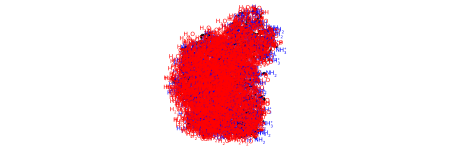

In [17]:
# Convert the PDB string to an RDKit molecule
mol = rdkit.Chem.MolFromPDBBlock(obj[0].decode('utf-8'))
mol

## UDF to add molecule descriptors 

In [21]:
@udf(params=('source', 'parent', 'name',), 
     output={'MolWt': Float, 'LogP': Float, 'NumHDonors': Int, 'NumHAcceptors': Int})
def calculate_descriptors(source, parent, name):
    """
    Given a file path to a .mol file, calculate and return molecular descriptors.
    """

    # Read a file 
    gcs_path = source + '/' + parent + '/' + name
    fs = gcsfs.GCSFileSystem()
    with fs.open(gcs_path, 'r') as f:
        pdb_content = f.read()
    
    # Convert the PDB content to an RDKit molecule
    mol = rdkit.Chem.MolFromPDBBlock(pdb_content)
    
    if mol:
        mol_weight = Descriptors.MolWt(mol)
        logP = Descriptors.MolLogP(mol)
        hb_donors = Descriptors.NumHDonors(mol)
        hb_acceptors = Descriptors.NumHAcceptors(mol)
        return (mol_weight, logP, hb_donors, hb_acceptors,)
    else:
        return None

In [22]:
pdb_data_extended = (
    DatasetQuery(STORAGE)
    .filter(C.name.glob("*.pdb"))
    .limit(10)
    .add_signals(calculate_descriptors)
)

In [23]:
import time
start_time = time.time()

display(pdb_data_extended.to_pandas())

print("--- %s seconds ---" % (time.time() - start_time))

,id,vtype,dir_type,parent_id,parent,name,checksum,etag,version,is_latest,...,owner_name,owner_id,anno,random,location,source,MolWt,LogP,NumHDonors,NumHAcceptors
0,1,,0,None,example-dvcx-pdb/refined-set/2p2a,2p2a_pocket.pdb,bb7e5272da52f6a24490c7e94e9bb692,CL+l44nKlIUDEAE=,1711547172311743,1,...,,,None,4932126455042298073,None,gcs://dvc-cse,7417.889,-34.3148,92,107
1,2,,0,None,example-dvcx-pdb/refined-set/2p2a,2p2a_protein.pdb,f5e665a3d861cb31ff219aaa8d9f379f,COi3z5HKlIUDEAE=,1711547188763624,1,...,,,None,5564574799767624138,None,gcs://dvc-cse,64709.296,-886.0673,811,727
2,3,,0,None,example-dvcx-pdb/refined-set/5i80,5i80_pocket.pdb,e5ca5ebdb0a84b7ba80e3075e880596d,CL+qlaDKlIUDEAE=,1711547219268927,1,...,,,None,7564525978459980801,None,gcs://dvc-cse,4739.638,-21.4591,51,63
3,4,,0,None,example-dvcx-pdb/refined-set/5i80,5i80_protein.pdb,38457d7a6e4dc5a5d0f0980ec31eb95f,CLrtsaDKlIUDEAE=,1711547219736250,1,...,,,None,2292415973947352260,None,gcs://dvc-cse,17115.268,-162.7373,192,184
4,5,,0,None,example-dvcx-pdb/refined-set/1q8u,1q8u_pocket.pdb,c415450570580161e41259ec5bc36989,CLyrjLLKlIUDEAE=,1711547256870332,1,...,,,None,4930459827851244105,None,gcs://dvc-cse,6696.987,-40.8070,85,95
5,6,,0,None,example-dvcx-pdb/refined-set/1q8u,1q8u_protein.pdb,25b9faf66b93037792f7b525d71f20c8,CKSDqrnKlIUDEAE=,1711547272036772,1,...,,,None,3117325110446842789,None,gcs://dvc-cse,46741.575,-548.8521,594,522
6,7,,0,None,example-dvcx-pdb/refined-set/1bn4,1bn4_pocket.pdb,15c43a2e7e06586aece87290db2f17fd,CLXVr4HKlIUDEAE=,1711547154688693,1,...,,,None,7877929230495344460,None,gcs://dvc-cse,6220.681,-16.2049,76,87
7,8,,0,None,example-dvcx-pdb/refined-set/1bn4,1bn4_protein.pdb,32059da642f74f9ffc71320a1068c383,CIqowITKlIUDEAE=,1711547161252874,1,...,,,None,2327732042031842198,None,gcs://dvc-cse,31366.800,-310.2179,393,358
8,9,,0,None,example-dvcx-pdb/refined-set/4zv2,4zv2_pocket.pdb,114a479c98003d19bf7542cbd1e7a6a5,CLOw0bDKlIUDEAE=,1711547253807155,1,...,,,None,1568913711510130970,None,gcs://dvc-cse,5582.179,-44.2313,72,86
9,10,,0,None,example-dvcx-pdb/refined-set/4zv2,4zv2_protein.pdb,ba210839afdcd98ec52babdf8505dce2,CMnY8bHKlIUDEAE=,1711547256433737,1,...,,,None,7578734898600498213,None,gcs://dvc-cse,29221.346,-387.8983,336,302


--- 16.870354175567627 seconds ---
